# Mia Tarantola Perceptron Blog Post

__[link to perceptron code](https://github.com/miatarantola/miatarantola.github.io/blob/main/posts/Perceptron%20Blog%20Post/perceptron.py)__


## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [129]:
#importing perceptron.py code and updating
import perceptron
from perceptron import Perceptron
import importlib
importlib.reload(perceptron)

<module 'perceptron' from '/Users/mtarantola@middlebury.edu/Downloads/Machine Learning/perceptron.py'>

## Walk Through of the Update Function

The following function is used to update the perceptron weights:

> $\tilde{w} ^{(t+1)} = \tilde{w} ^ {(t)} + \mathbb{1}(\tilde{y_i}  \langle \tilde{w}^{(t)}, \tilde{x_i} \rangle < 0) \tilde{y_i} \tilde{x_i}$ 

In order to implement this algorithm, we must follow these steps.

${1.}$ pick a random index $~{i} \in$ n. 

${2. }$ predict the label, $\hat{y_i}$, of our randomly selected data point, $\tilde{x_i}$.

> To do so we calculate the dot product, $\langle \tilde{w}^{(t)}, \tilde{x_i} \rangle$ and compare the resulting value to 0.

> if the result is greater than 0 return 1, otherwise return -1.

${3.}$ compute $\mathbb{1}(\tilde{y_i}  \langle \tilde{w}^{(t)}, \tilde{x_i} \rangle < 0)$

> Given our predicted label, $\hat{y_i}$ , of 1 or -1 we can multiply by $\tilde{y_i}$ to check for correctness

> If $\hat{y_i} \tilde{y_i} <0$ then the signs of our observed and predicted label do not match. If $\hat{y_i} \tilde{y_i} >0$ then the signs of our predicted and observed label match

So, $\mathbb{1}(\tilde{y_i}  \langle \tilde{w}^{(t)}, \tilde{x_i} \rangle < 0)$ returns 1 if model predicted incorrectly and $\tilde{y_i} \tilde{x_i}$ is added to the pre-existing weights.

Otherwise the expression returns 0 for a correctly prediction and no update is performed





## Experiments

### Data that is linearly separable

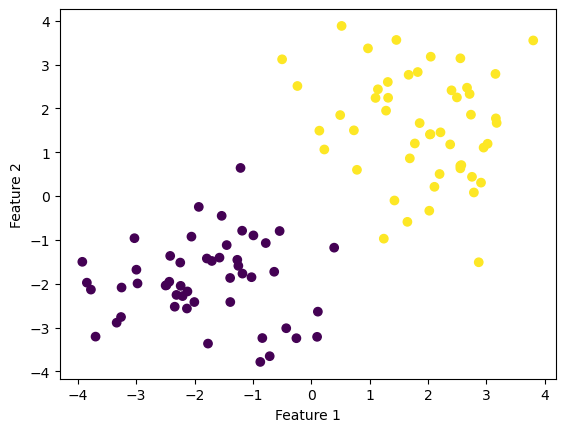

In [198]:
np.random.seed(8674)

n = 100
p_features = 3

X1, y1 = make_blobs(n_samples = 100, n_features = 2,centers=[(-1.7,-1.7),(1.7,1.7)])

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [199]:
p1 = Perceptron()

In [200]:
p1.fit(X1,y1,100000)

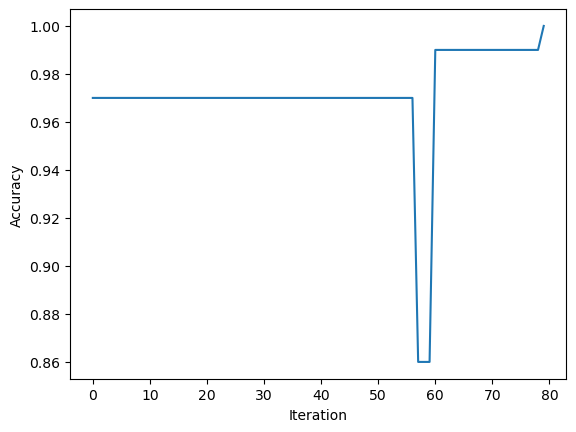

In [201]:
fig1 = plt.plot(p1.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [202]:
p1.score(X1,y1)

1.0

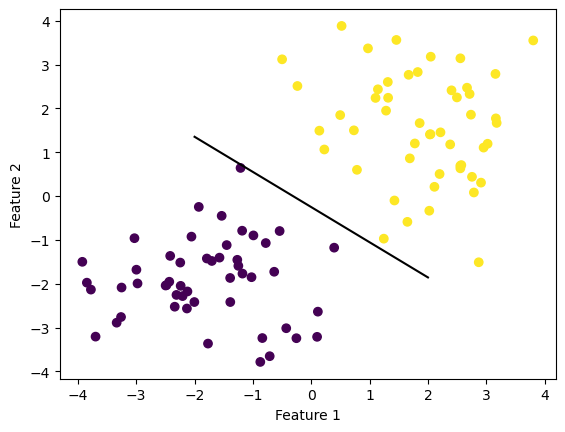

In [203]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X1[:,0], X1[:,1], c = y1)
fig = draw_line(p1.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### Data that is not linearly separable

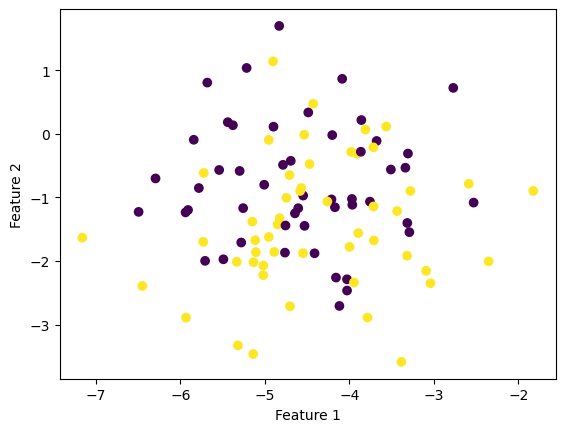

In [226]:
np.random.seed(7810) #7810

n = 100
p_features = 3

X2, y2 = make_blobs(n_samples = 100,n_features=2, centers=2)

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [205]:
p2 = Perceptron()

In [206]:
p2.fit(X2,y2,1000)

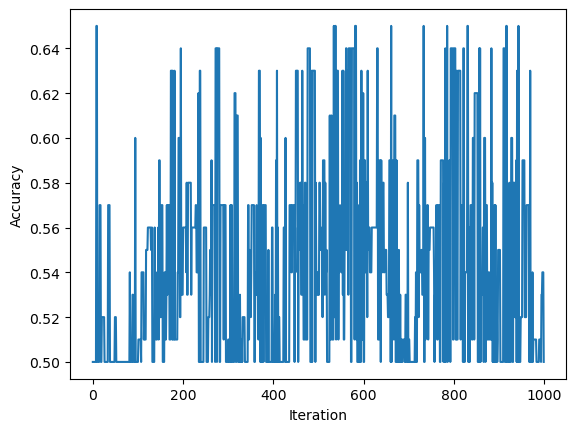

In [207]:
fig3 = plt.plot(p2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [208]:
p2.score(X2,y2)

0.5

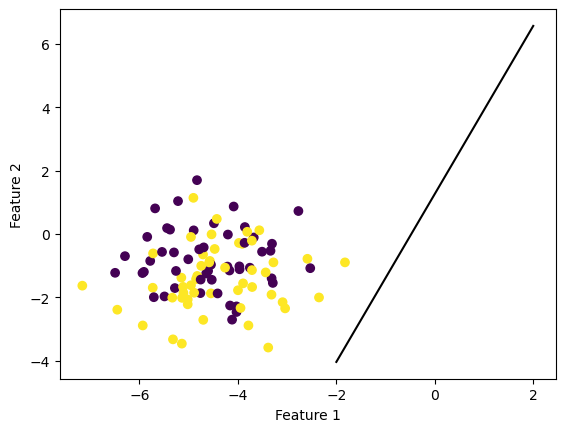

In [210]:
fig = plt.scatter(X2[:,0], X2[:,1], c = y2)
fig = draw_line(p2.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### The perceptron algorithm in >2 dimensions

In [227]:
np.random.seed(7810) #7810

n = 100

X3, y3 = make_blobs(n_samples = 100,n_features=6, centers=2)


In [228]:
p3 = Perceptron()

In [229]:
p3.fit(X3,y3,1000)

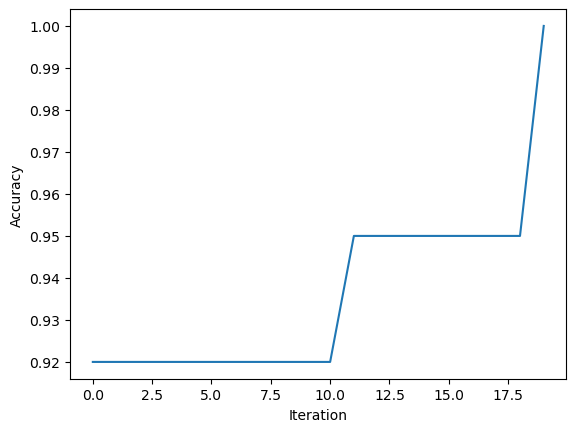

In [230]:
fig4 = plt.plot(p3.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [231]:
p3.score(X3,y3)

1.0

Yes, I do believe that my data is linearly separable because my perceptron's accuracy converges to 1 after 18 iterations. This means that my perceptron reached 100% accuracy and did not complete upon reaching that maximum number of iterations.

### Ending Question

The time complexity for a single iteration of the perceptron algorithm is O(p) because predicting the label of a single data point requires calculating the dot product of x and w. Thus, np iterates over the p features of x to calulate the dot product. All other steps of this equation invlove simple multiplication or addition which are O(1).